# Libraries

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
import sys
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
heights = np.loadtxt("data/nhanes_adult_female_height_2020.txt")
income = np.loadtxt("data/uk_income_simulated_2020.txt")

# Summarising data

In [3]:
print(f"Mean: {round(np.mean(heights), 2)} - Median: {np.median(heights)}")

Mean: 160.14 - Median: 160.1


In [4]:
print(f"Mean: {np.mean(income).round(2)} - Median: {np.median(income)}")

Mean: 35779.99 - Median: 30042.0


In [5]:
def my_mean(d):
    return np.sum(d) / len(d)


print(f"My mean: heights = {my_mean(heights)}")
print(f"np.mean: heights = {np.mean(heights)}")

print(f"My mean: income = {my_mean(income)}")
print(f"np.mean: income = {np.mean(income)}")

My mean: heights = 160.13679222932953
np.mean: heights = 160.13679222932953
My mean: income = 35779.994
np.mean: income = 35779.994


In [6]:
def my_median(d):
    d_sorted = np.sort(d)
    n = len(d_sorted)
    if (n % 2) == 0:
        # even lenght
        return (d_sorted[int(n/2)-1] + d_sorted[int(n/2)]) / 2
    else:
        # odd lenght
        return d_sorted[int((n+1)/2)]


print(f"My median: heights = {my_median(heights)}")
print(f"np.median: heights = {np.median(heights)}")

print(f"My median: income = {my_median(income)}")
print(f"np.median: income = {np.median(income)}")

My median: heights = 160.1
np.median: heights = 160.1
My median: income = 30042.0
np.median: income = 30042.0


In [7]:
print(np.quantile(heights, [0, 0.25, 0.5, 0.75, 1]))

# 0 quantile is the min
# 0.5 quantile is the median
# 1 quantile is the max
print(np.min(heights), np.median(heights), np.max(heights))

print(np.quantile(heights, [0.025, 0.975]))


[131.1 155.3 160.1 164.8 189.3]
131.1 160.1 189.3
[146.45 174.  ]


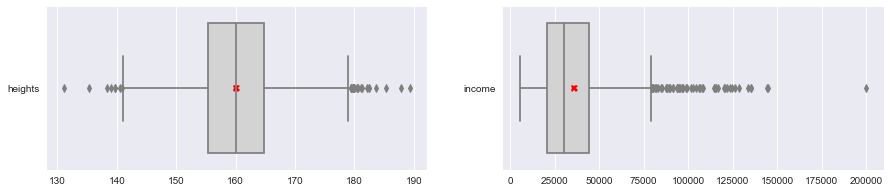

In [8]:
plt.figure(figsize=[15, 3])

plt.subplot(1, 2, 1)
sns.boxplot(data=heights, orient="h", color="lightgray")
plt.plot(np.mean(heights), 0, "rX") # plot the mean
plt.yticks([0], ["heights"])

plt.subplot(1, 2, 2)
sns.boxplot(data=income, orient="h", color="lightgray")
plt.plot(np.mean(income), 0, "rX") # plot the mean
plt.yticks([0], ["income"])
plt.show()


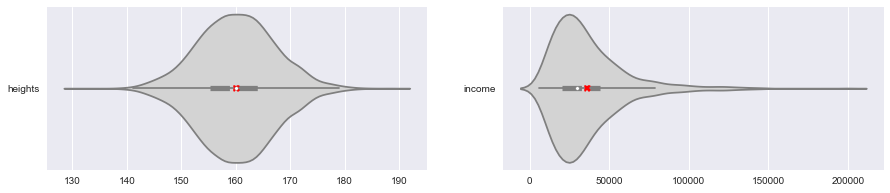

In [9]:
plt.figure(figsize=[15, 3])

plt.subplot(1, 2, 1)
sns.violinplot(data=heights, orient="h", color="lightgray")
plt.plot(np.mean(heights), 0, "rX") # plot the mean
plt.yticks([0], ["heights"])

plt.subplot(1, 2, 2)
sns.violinplot(data=income, orient="h", color="lightgray")
plt.plot(np.mean(income), 0, "rX") # plot the mean
plt.yticks([0], ["income"])
plt.show()

# Transforming data

In [10]:
# Standardization and Z-score

print(f"Mean heights: {np.round(np.mean(heights), 2)}")
print(f"SD heights: {np.round(np.std(heights), 2)}")

heights_std = (heights - np.mean(heights)) / np.std(heights)

print(f"Mean standardized heights: {np.round(np.mean(heights_std), 2)}")
print(f"SD standardized heights: {np.round(np.std(heights_std), 2)}")

Mean heights: 160.14
SD heights: 7.06
Mean standardized heights: 0.0
SD standardized heights: 1.0


In [11]:
# Min-Max Scaling and Clipping

print(f"Mean heights: {np.round(np.mean(heights), 2)}")
print(f"SD heights: {np.round(np.std(heights), 2)}")

heights_mm = (heights - np.min(heights)) / (np.max(heights) - np.min(heights))

print(f"Min clipped heights: {np.round(np.min(heights_mm), 2)}")
print(f"Max clipped heights: {np.round(np.max(heights_mm), 2)}")
print(f"SD clipped heights: {np.round(np.std(heights_mm), 2)}")

Mean heights: 160.14
SD heights: 7.06
Min clipped heights: 0.0
Max clipped heights: 1.0
SD clipped heights: 0.12


In [12]:
# Normalization (L2, dividing by sum of squares)

print(f"Mean heights: {np.round(np.mean(heights), 2)}")
print(f"SD heights: {np.round(np.std(heights), 2)}")

heights_L2 = heights / np.sqrt(np.sum(heights**2))

print(f"Mean normalized heights: {np.round(np.mean(heights_L2), 5)}")
print(f"SD normalized heights: {np.round(np.std(heights_L2), 5)}")


Mean heights: 160.14
SD heights: 7.06
Mean normalized heights: 0.01538
SD normalized heights: 0.00068


In [13]:
# Normalization (L1, dividing by sum)

print(f"Mean heights: {np.round(np.mean(heights), 2)}")
print(f"SD heights: {np.round(np.std(heights), 2)}")

heights_L1 = heights / np.sum(np.abs(heights))

print(f"Mean normalized heights: {np.round(np.mean(heights_L1), 5)}")
print(f"SD normalized heights: {np.round(np.std(heights_L1), 5)}")


Mean heights: 160.14
SD heights: 7.06
Mean normalized heights: 0.00024
SD normalized heights: 1e-05
